In [2]:
import os
%load_ext dotenv
%dotenv
key = os.environ.get('BING_KEY')
from fastbook import *

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [3]:
friends = ['ben', 'elizabeth', 'andy', 'sam', 'stef', 'haylee']
doppelgangers = ['timothee chalamet', 'florence pugh', 'ed helms', 'ryan eggold', 'elizabeth olsen', 'zooey deschanel']
path = Path('data')

In [4]:
if not path.exists():
    path.mkdir()
    for friend, doppelganger in zip(friends, doppelgangers):
        dest = (path/friend)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, doppelganger)
        download_images(dest, urls=results.attrgot('contentUrl'))

In [9]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

In [45]:
friends_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.3),
    batch_tfms=aug_transforms())
dls = friends_data.dataloaders(path)

In [47]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/hayleeham/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.428170,1.629756,0.581250,01:00


epoch,train_loss,valid_loss,error_rate,time
0,1.095718,1.311800,0.450000,01:11
1,0.886836,1.211963,0.387500,01:11
2,0.715579,1.169288,0.368750,01:11
3,0.597587,1.122935,0.368750,01:12


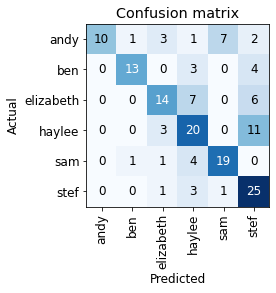

In [48]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

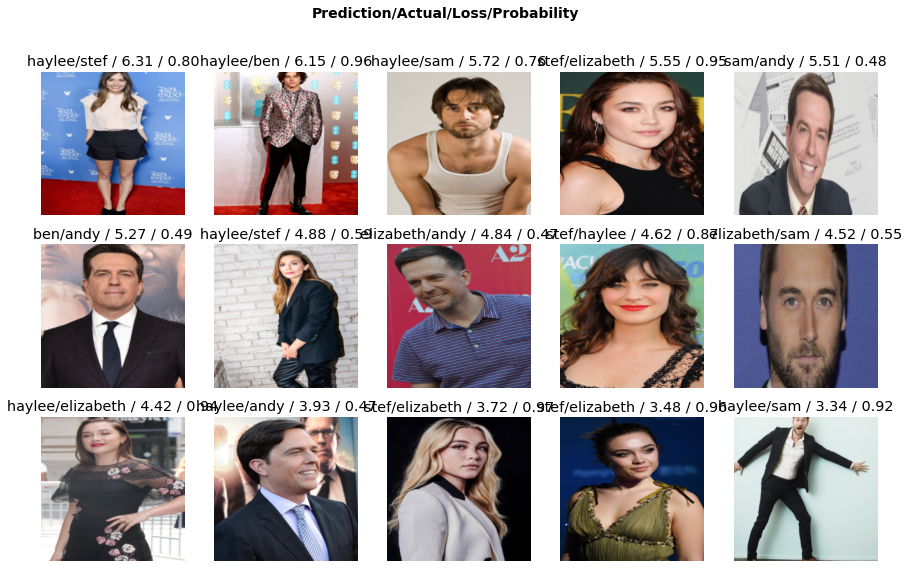

In [53]:
interp.plot_top_losses(15, nrows=3)